In [53]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import csv

# Multi-Factor Anova Test


In [54]:
def get_value(i,j,k,n):
    value = 0

    match i:
        case "Yes":  value+= np.random.randint(0,10) *1
        case "No":  value+= np.random.randint(0,10) *0

    match j:
        case "Steel" : value += np.random.randint(0,10) * 0.5
        case "Iron" : value += np.random.randint(0,10) * 0.7
        case "Aluminum" : value += np.random.randint(0,10) * 0.1
    
    match k:
        case _ : pass
    
    

    return round(value,2)
    

In [56]:
# Generate data
points_per_group = 10
I_values = ["Yes", "No"]
J_values = ["Steel", "Iron", "Aluminum"]
K_values = ["0-10", "10-20", "20-30", "30-40", "40-60", "60-70", "70-80", "80-90", "90-100"]

data = []

for i in I_values:
    for j in J_values:
        for k in K_values:
            for n in range(points_per_group):
                datapoint = {"Factor 1":i, "Factor 2":j, "Factor 3":k, "Value":get_value(i,j,k,n)}
                data.append(datapoint)

data = np.array(data)
np.random.shuffle(data)

with open("C:\\Users\\mherve\\Documents\\Courses\\Stat\\Week13\\Data_Week13.csv", 'w+') as file:
    writer = csv.writer(file, delimiter=',', lineterminator='\n')
    head = ["Annealed", "Material", "Ambient Humidity", "Material Score"]
    writer.writerow(head)
    for point in data: writer.writerow( [point["Factor 1"], point["Factor 2"], point["Factor 3"], point["Value"]])



Load the data from the csv file. Remember to check the csv file for yourself to know which data types to expect and which columns or lines to skip.

Here we are expecting different data types and might need to load different lines seperately.

In [61]:
data = np.loadtxt("C:\\Users\\mherve\\Documents\\Courses\\Stat\\Week13\\Data_Week13.csv", delimiter=',', skiprows=1, dtype=str, usecols=[0,1,2])
value = np.loadtxt("C:\\Users\\mherve\\Documents\\Courses\\Stat\\Week13\\Data_Week13.csv", delimiter=',', skiprows=1, dtype=float , usecols=[3])

print(data[:5])
print()
print(value[:5])
print()
print(data.shape)
print(value.shape)
print()

value = np.reshape( value, (540,1))


data = np.concatenate( (data, value), axis=1)

print(data.shape)
print()
print(data[:5])

# Note the fact that the values are stored as float.



[['No' 'Steel' '70-80']
 ['Yes' 'Aluminum' '70-80']
 ['No' 'Aluminum' '0-10']
 ['Yes' 'Steel' '60-70']
 ['No' 'Aluminum' '60-70']]

[2.5 2.6 0.8 3.5 0.4]

(540, 3)
(540,)

(540, 4)

[['No' 'Steel' '70-80' '2.5']
 ['Yes' 'Aluminum' '70-80' '2.6']
 ['No' 'Aluminum' '0-10' '0.8']
 ['Yes' 'Steel' '60-70' '3.5']
 ['No' 'Aluminum' '60-70' '0.4']]


Make 3 lists with the different *levels* that our *factors* can take. These are categories and have no mathematical meaning.

In [37]:
Factor1_values = np.array(["Yes", "No"])
Factor2_values = np.array(["Steel", "Iron", "Aluminum"])
Factor3_values = np.array(["0-10", "10-20", "20-30", "30-40", "40-60", "60-70", "70-80", "80-90", "90-100"])

#### Partial Means
Let us now make the partial means table for Factors 1 and 2.

Start by using a for loop to iterate on the different levels of both factors, and look through the data to find points that fit into this category. Average them and add them to a matrix of appropriate size. Also do the same for the unbiased standard deviation.

Remember that you cna use *arr[condition]* to filter out values from an array, and the *&* symbol to use multiple conditions. 

In [79]:
# Comparing 1 and 2
mean_matrix12 = []
ste_matrix12 = []


# Practice Browsing : 
reduced = data[:10]
print(reduced)
print()

boolean_list = reduced[:,0]=='Yes'
print(boolean_list)

boolean_list = (reduced[:,0]=='Yes') & (reduced[:,1]=='Aluminum')
print(boolean_list)
print()
print( reduced[boolean_list] )



# Compare 1 and 2
for i in Factor1_values:
    line_mean = []
    line_ste = []
    for j in Factor2_values:
        ij_values = data[ (data[:,0]==i) & (data[:,1]==j) ][:,3].astype(float)
        line_mean.append( np.mean(ij_values) )
        line_ste.append( np.std(ij_values, ddof=1) / np.sqrt(len(ij_values)) ) 
    mean_matrix12.append(line_mean)
    ste_matrix12.append(line_ste)

mean_matrix12 = np.array(mean_matrix12)
ste_matrix12 = np.array(ste_matrix12)

print("Mean Matrix")
print(mean_matrix12)
print()
print("SSE Matrix")
print(ste_matrix12)


[['No' 'Steel' '70-80' '2.5']
 ['Yes' 'Aluminum' '70-80' '2.6']
 ['No' 'Aluminum' '0-10' '0.8']
 ['Yes' 'Steel' '60-70' '3.5']
 ['No' 'Aluminum' '60-70' '0.4']
 ['Yes' 'Steel' '10-20' '4.5']
 ['Yes' 'Aluminum' '40-60' '8.6']
 ['No' 'Iron' '10-20' '0.0']
 ['Yes' 'Steel' '20-30' '8.0']
 ['No' 'Aluminum' '40-60' '0.1']]

[False  True False  True False  True  True False  True False]
[False  True False False False False  True False False False]

[['Yes' 'Aluminum' '70-80' '2.6']
 ['Yes' 'Aluminum' '40-60' '8.6']]
Mean Matrix
[[6.29444444 7.17333333 4.93777778]
 [2.15555556 3.11888889 0.41777778]]

SSE Matrix
[[0.36607839 0.36882511 0.31975169]
 [0.15853662 0.20128733 0.02898955]]


Use the given function to plot the partial mean table.

In [80]:
from tabulate import tabulate

def plot_mean_matrix(factor1, factor2, matrix, partial_mean1, partial_mean2, total_mean):
    """ Takes the given Factor Levels, group means and partial means and represents them in a table.
    factor1 : A list of levels that the first factor can take.  size (N,)
    factor2 : A list of levels that the second factor can take. size (M,)
    matrix : The group means of the given levels.   size(N,M)
    partial_mean1 : The means over the levels of the first factor   size (N,)
    partial_mean2 : The means over the levels of the second factor  size (M,)
    total_mean : The total mean of the table
    """


    # Round to get better looking table
    matrix = np.round(matrix, 3)
    partial_mean1 = np.round(partial_mean1, 3)
    partial_mean2 = np.round(partial_mean2, 3)
    total_mean = np.round(total_mean, 3)

    # Make sure the size is appropriate
    factor1 = np.reshape( factor1, (len(factor1),1))
    partial_mean1 = np.reshape( partial_mean1, (len(partial_mean1),1))

    # Main Matrix
    mydata = np.concatenate( (factor1, matrix), axis=1)
    # Create Header
    head = factor2

    # Add partial means
    mydata = np.concatenate( (mydata, partial_mean1), axis=1)
    mydata = np.concatenate( (mydata, np.reshape(np.append( np.append([" "],partial_mean2),[total_mean]), (1,mydata.shape[1])) ) , axis=0)
    head = np.append(head, [" "] )

    # Display table
    print(tabulate(mydata, headers=head, tablefmt="grid"))


# See the shape to be clear on which axis to act
Factor1_PartialMeans = np.mean(mean_matrix12, axis=1)
Factor2_PartialMeans = np.mean(mean_matrix12, axis=0)
Total_Mean = np.mean(mean_matrix12)

plot_mean_matrix(Factor1_values, Factor2_values, mean_matrix12, Factor1_PartialMeans, Factor2_PartialMeans, Total_Mean)
plot_mean_matrix(Factor2_values, Factor1_values, np.transpose(mean_matrix12), Factor2_PartialMeans, Factor1_PartialMeans, Total_Mean)



+-----+---------+--------+------------+-------+
|     |   Steel |   Iron |   Aluminum |       |
+=====+=========+========+============+=======+
| Yes |   6.294 |  7.173 |      4.938 | 6.135 |
+-----+---------+--------+------------+-------+
| No  |   2.156 |  3.119 |      0.418 | 1.897 |
+-----+---------+--------+------------+-------+
|     |   4.225 |  5.146 |      2.678 | 4.016 |
+-----+---------+--------+------------+-------+
+----------+-------+-------+-------+
|          |   Yes |    No |       |
+==========+=======+=======+=======+
| Steel    | 6.294 | 2.156 | 4.225 |
+----------+-------+-------+-------+
| Iron     | 7.173 | 3.119 | 5.146 |
+----------+-------+-------+-------+
| Aluminum | 4.938 | 0.418 | 2.678 |
+----------+-------+-------+-------+
|          | 6.135 | 1.897 | 4.016 |
+----------+-------+-------+-------+


Represent the different means on a plot with errorbars. The x axis should correspond to the levels of one factor, and multiple plots should represent different values of a second factor.

(2,)
[5.45       0.83444444]


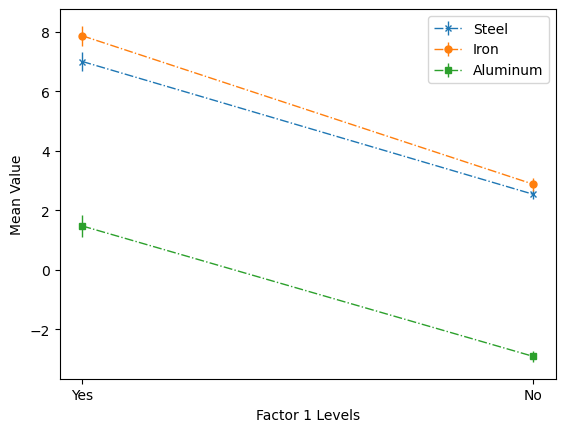

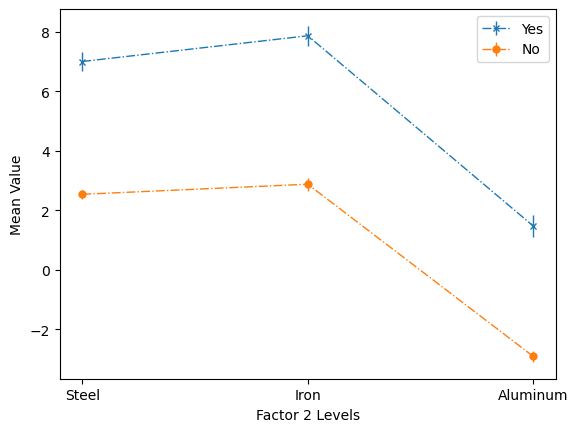

In [40]:

print(Factor1_values.shape)
print(mean_matrix12.mean(axis=1))

plt.errorbar(Factor1_values, mean_matrix12[:,0], ste_matrix12[:,0], linewidth=1, marker="x", markersize=5, linestyle='-.', label="Steel", )
plt.errorbar(Factor1_values, mean_matrix12[:,1], ste_matrix12[:,1], linewidth=1, marker="o", markersize=5, linestyle='-.', label="Iron")
plt.errorbar(Factor1_values, mean_matrix12[:,2], ste_matrix12[:,2], linewidth=1, marker="s", markersize=5, linestyle='-.', label="Aluminum")

plt.xlabel("Factor 1 Levels")
plt.ylabel("Mean Value")
plt.legend()
plt.show()


# Or 

plt.errorbar(Factor2_values, mean_matrix12[0,:], ste_matrix12[0,:], linewidth=1, marker="x", markersize=5, linestyle='-.', label="Yes", )
plt.errorbar(Factor2_values, mean_matrix12[1,:], ste_matrix12[1,:], linewidth=1, marker="o", markersize=5, linestyle='-.', label="No")

plt.xlabel("Factor 2 Levels")
plt.ylabel("Mean Value")
plt.legend()
plt.show()




**(Optional)** Compute the partial mean table of Factor 3 with one other factor, using the previous function.

In [82]:
# Comparing 1 and 3
mean_matrix13 = []

for i in Factor1_values:
    line = []
    for j in Factor3_values:
        ij_values = data[ (data[:,0]==i) & (data[:,2]==j) ][:,3].astype(float)
        group_mean = np.mean( ij_values )
        line.append(group_mean)
    mean_matrix13.append(line)

mean_matrix13 = np.array(mean_matrix13)

Factor1_PartialMeans = np.mean(mean_matrix13, axis=1)
Factor3_PartialMeans = np.mean(mean_matrix13, axis=0)
Total_Mean = np.mean(mean_matrix13)


plot_mean_matrix(Factor1_values, Factor3_values, mean_matrix13, Factor1_PartialMeans, Factor3_PartialMeans, Total_Mean)



+-----+--------+---------+---------+---------+---------+---------+---------+---------+----------+-------+
|     |   0-10 |   10-20 |   20-30 |   30-40 |   40-60 |   60-70 |   70-80 |   80-90 |   90-100 |       |
+=====+========+=========+=========+=========+=========+=========+=========+=========+==========+=======+
| Yes |  6.273 |   5.613 |   5.34  |   5.91  |   6.973 |   6.897 |   6.077 |   6.163 |    5.97  | 6.135 |
+-----+--------+---------+---------+---------+---------+---------+---------+---------+----------+-------+
| No  |  2.11  |   1.603 |   1.633 |   2.423 |   1.897 |   1.147 |   2.3   |   1.863 |    2.1   | 1.897 |
+-----+--------+---------+---------+---------+---------+---------+---------+---------+----------+-------+
|     |  4.192 |   3.608 |   3.487 |   4.167 |   4.435 |   4.022 |   4.188 |   4.013 |    4.035 | 4.016 |
+-----+--------+---------+---------+---------+---------+---------+---------+---------+----------+-------+
